# Simple Autoencoder
In this notebook we will implement a simple autoencoder in Pytorch on the MNIST and Cifar dataset.

# Autoencoder

<img src="imgs/autoencoder.png">

First we important all of the packages we will use. Many of these packages are standard packages that are used when creating these networks. The exception is the MNIST package. 

In [51]:
import os
import matplotlib.pyplot as plt
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable

from torchvision.datasets import MNIST
from torchvision.utils import save_image

Test if GPU is available.

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if str(device) == "cuda":
    print('Using GPU')
else:
    print('Using CPU')

Using CPU


Remember that print output should be put in a log file for view in a job submission. Next we will create the folders where we will put test output and saved models.

In [8]:
# ================= Parameters ============================
num_epochs = 100
batch_size = 128
learning_rate = 1e-3

I define these paramters before I create output folders in order to name the folder of where I want the output to live. This is helpful when you are trying out different learning rates and you want to keep track of your results.

Next we will create our output folders

In [15]:
folder = 'Autoencoder_batch_size_'+str(batch_size)+'_lr='+str(learning_rate)
folder_name = '/home/odeguchy/Documents/'+folder+'/'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
if not os.path.exists(folder_name+'/saved_models'):
    os.mkdir(folder_name+'/saved_models')
if not os.path.exists(folder_name+'/recons'):
    os.mkdir(folder_name+'/recons')

### Image Normalization
Here we pause to talk about the normalization of your inputs. We plan on using the tanh activation function at the end of this autoencoder. The tanh activation function looks like the following:

<img src="imgs/Tanh.gif">

Note that the range of the function falls within the interval -1 to 1. We therefore need to normalize our images in order for the output to match the target. There are many papers stating that normalizing the data helps reduce any skewness resulting in faster learning.

Because we are normalizing the data we need a way to undo the normalization so that we can see the images during the training process. The following helper function accomplishes this task:

In [16]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

We now will create a data loader using the trasnforms in the Pytorch API. The we compose a transform which consists of all of the actions we wish to take on the data. 

### Transform
You always want to convert the data to a tensor. This is the natural structure that pytorch deals with. 
You also always want to normalize the data as stated above. The arguments in the normalization function pertain to the mean and standard deviation. The first vector (0.5 , 0.5, 0.5) pertains to the mean of each channel the second vector pertains to the standard deviation. Normalize does the following to each channel:
image = (image - mean) / std

In [31]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_loader = torch.utils.data.DataLoader(MNIST('/home/odeguchy/Documents/data', train=True,download=True,
                                                transform = img_transform),batch_size=batch_size,shuffle=True)


test_loader = torch.utils.data.DataLoader(MNIST('/home/odeguchy/Documents/data',train=False,download=True,
                                               transform=img_transform),batch_size=10000,shuffle=False)


In [36]:
print('There are {} batches for training.'.format(len(train_loader)) )
print('There is {} batch for training.'.format(len(test_loader)))

There are 469 batches for training.
There is 1 batch for training.


We would like to sample one batch from the train loader. Remember this is a list structure and each item in the list is a batch. The batch is a tensor containing all of the images. 

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
torch.Size([3, 272, 452])
torch.Size([272, 452, 3])


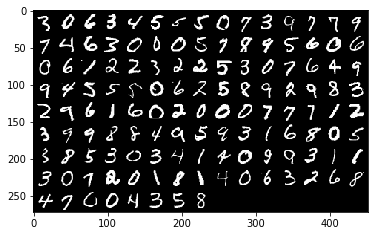

In [71]:
sample_batch,_ = next(iter(train_loader))
print(sample_batch.shape)
pics = to_img(sample_batch)
print(pics.shape)
print(torchvision.utils.make_grid(pics,nrow=15).shape)
print(torchvision.utils.make_grid(pics,nrow=15).permute(1,2,0).shape)
plt.imshow(torchvision.utils.make_grid(pics,nrow=15).permute(1, 2, 0))